<img src="https://raw.githubusercontent.com/alan-barzilay/NLPortugues/master/imagens/logo_nlportugues.png"   width="150" align="right">


# Lista 6 - LSTM & GRU


______________



O objetivo desta lista é fazer com que vocês treinem um modelo de análise de sentimentos utilizando GRU's e LSTM's. Essa lista é semelhante a lista 03 onde aprendemos a usar embeddings e onde você ja recebeu a arquitetura do seu modelo quase pronta. A diferença é que desta vez você ira construir sozinho sua rede e utilizará as camadas que acabamos de aprender: LSTM e GRU.

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

2024-08-24 23:44:45.613632: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-24 23:44:45.639202: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-24 23:44:45.647320: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-24 23:44:45.667206: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-24 23:44:47.386920: W tensorflow/compiler/tf2

## Importando os dados como um dataframe

Para esta lista nós utilizaremos um recorte do dataset **B2W-Reviews01** que consiste em avaliações de mais de 130k compras online no site Americanas.com e [esta disponivel no github](https://github.com/b2wdigital/b2w-reviews01) sob a licensa CC BY-NC-SA 4.01.

In [2]:
df = pd.read_csv('b2w-10k.csv')
df = df[['review_text', 'recommend_to_a_friend']]


## Pré-processamento
# <font color='blue'>Questão 1 </font>
Copie suas etapas de préprocessamento da lista 03, ou seja, selecione apenas as colunas relevantes ("review_text" e "recommend_to_a_friend"), converta a coluna "review_text" de uma coluna de `str` para uma coluna de `int` e separe os dados em teste e treino.


In [3]:
df['recommend_to_a_friend'] = df['recommend_to_a_friend'].map({'Yes': 1, 'No': 0})
df.dropna(subset=['review_text', 'recommend_to_a_friend'], inplace=True)

## Tokenizando




# <font color='blue'>Questão 2 </font>
Utilizando a camada [`TextVectorization`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing/TextVectorization) tokenize os inputs.
Declare a camada e então chame a função `adapt()` no seu conjunto de treino para adequar o seu vocabulário aos reviews.

Note que o uso de padding não é mais necessario.

In [4]:
from sklearn.model_selection import train_test_split

# Parâmetros
max_features = 15000  # Número máximo de palavras no vocabulário
max_len = 50  # Comprimento máximo da sequência (ajustado com base nos dados)

# Carregar os dados e dividir em treino/teste
X_train, X_test, y_train, y_test = train_test_split(df['review_text'],
                                                    df['recommend_to_a_friend'],
                                                    test_size=0.25, random_state=42)

# Criar a camada TextVectorization
vectorize_layer = tf.keras.layers.TextVectorization(
    max_tokens=max_features,
    output_mode='int',
    output_sequence_length=max_len
)

# Adaptar a camada TextVectorization ao conjunto de treino
vectorize_layer.adapt(X_train)

# Aplicar a tokenização no conjunto de treino e teste
X_train_vectorized = vectorize_layer(X_train)
X_test_vectorized = vectorize_layer(X_test)

# Verificar os shapes
print(f"Tamanho do conjunto de treino tokenizado: {X_train_vectorized.shape}")
print(f"Tamanho do conjunto de teste tokenizado: {X_test_vectorized.shape}")

Tamanho do conjunto de treino tokenizado: (7499, 50)
Tamanho do conjunto de teste tokenizado: (2500, 50)


## LSTM&GRU

Agora vamos juntar a camada do tokenizador a nossa camada [Embedding](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding) e definir o resto de nosso modelo.

#  <font color='blue'>Questão 3 </font>

a) Defina, compile, treine e avalie seu modelo, utilize camadas  [LSTM](https://keras.io/api/layers/recurrent_layers/lstm/).
Atenção a dimensão do input da camada de embedding, lembre se que < OOV > e < PAD > possuem seus próprios tokens.



b) Como foi a performance desta rede em comparação a da lista 3?




**<font color='red'> Sua resposta aqui </font>**

In [5]:
# Criar o modelo LSTM com o input_shape explicitamente definido
model_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_features, output_dim=100, input_length=max_len),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compilar o modelo
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Ver o resumo do modelo
model_lstm.build(input_shape=(None, max_len))  # Define explicitamente o input_shape
model_lstm.summary()

/home/hub/COURSERA/NLP/nlp/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 50, 100)        │     1,500,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        42,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,542,305 (5.88 MB)

 Trainable params: 1,542,305 (5.88 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Treinar o modelo LSTM
history_lstm = model_lstm.fit(X_train_vectorized, y_train, epochs=5, batch_size=32, validation_data=(X_test_vectorized, y_test))

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.7539 - loss: 0.5197 - val_accuracy: 0.7312 - val_loss: 0.4072
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.7483 - loss: 0.4135 - val_accuracy: 0.7700 - val_loss: 0.4168
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.7633 - loss: 0.4004 - val_accuracy: 0.8264 - val_loss: 0.3764
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.8426 - loss: 0.3664 - val_accuracy: 0.8492 - val_loss: 0.4330
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.8924 - loss: 0.3328 - val_accuracy: 0.8788 - val_loss: 0.3604


#  <font color='blue'>Questão 4 </font>

a) Defina, compile, treine e avalie seu modelo, utilize camadas [GRU](https://keras.io/api/layers/recurrent_layers/gru/).
Atenção a dimensão do input da camada de embedding, lembre se que < OOV > e < PAD > possuem seus próprios tokens.



b) Como foi a performance desta rede em comparação a da lista 3?


**<font color='red'> Sua resposta aqui </font>**

In [7]:
# Criar o modelo GRU
model_gru = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_features, output_dim=100, input_length=max_len),
    tf.keras.layers.GRU(64),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compilar o modelo
model_gru.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Ver o resumo do modelo
model_gru.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Treinar o modelo GRU
history_gru = model_gru.fit(X_train_vectorized, y_train, epochs=5, batch_size=32, validation_data=(X_test_vectorized, y_test))

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.7317 - loss: 0.5653 - val_accuracy: 0.8440 - val_loss: 0.3364
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.8926 - loss: 0.2781 - val_accuracy: 0.9056 - val_loss: 0.2483
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.9574 - loss: 0.1343 - val_accuracy: 0.8944 - val_loss: 0.2619
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.9793 - loss: 0.0836 - val_accuracy: 0.8832 - val_loss: 0.3053
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.9887 - loss: 0.0515 - val_accuracy: 0.8872 - val_loss: 0.3943


## Redes Bi-direcionais
#  <font color='blue'>Questão 5 </font>

a) Defina, compile, treine e avalie um novo modelo que utilize contexto em ambas as direções usando a camada [`Bidirectional()`](https://keras.io/api/layers/recurrent_layers/bidirectional/), seja com camadas GRU ou LSTM.


b) Como foi sua performance em relação as questões anteriores com contexto unidirecional?

**<font color='red'> Sua resposta aqui </font>**

In [9]:
# Garantir que as entradas estão tokenizadas
X_train_vectorized = vectorize_layer(X_train)
X_test_vectorized = vectorize_layer(X_test)

# Converter para arrays NumPy (se necessário)
X_train_vectorized = X_train_vectorized.numpy()
X_test_vectorized = X_test_vectorized.numpy()

# Verifique os tipos
print(type(X_train_vectorized), X_train_vectorized.dtype)
print(type(X_test_vectorized), X_test_vectorized.dtype)

<class 'numpy.ndarray'> int64
<class 'numpy.ndarray'> int64


In [10]:
# Converta os dados de entrada para o tipo numérico apropriado
X_train_vectorized = np.array(X_train_vectorized)
X_test_vectorized = np.array(X_test_vectorized)

In [11]:
import tensorflow as tf

# Criar o modelo Bidirecional com LSTM
model_bidirectional = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_features, output_dim=100, input_length=max_len),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compilar o modelo
model_bidirectional.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_bidirectional.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [12]:
history_bidirectional = model_bidirectional.fit(X_train_vectorized, y_train, epochs=5, batch_size=32, validation_data=(X_test_vectorized, y_test))

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.7926 - loss: 0.4416 - val_accuracy: 0.9012 - val_loss: 0.2430
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.9323 - loss: 0.1890 - val_accuracy: 0.9020 - val_loss: 0.2523
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.9665 - loss: 0.1092 - val_accuracy: 0.8868 - val_loss: 0.3016
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9820 - loss: 0.0689 - val_accuracy: 0.8796 - val_loss: 0.3443
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9899 - loss: 0.0421 - val_accuracy: 0.8740 - val_loss: 0.3658


In [13]:
test_loss_bidirectional, test_accuracy_bidirectional = model_bidirectional.evaluate(X_test_vectorized, y_test)
print(f"Test Loss: {test_loss_bidirectional}, Test Accuracy: {test_accuracy_bidirectional}")

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8706 - loss: 0.3637
Test Loss: 0.3657514750957489, Test Accuracy: 0.8740000128746033


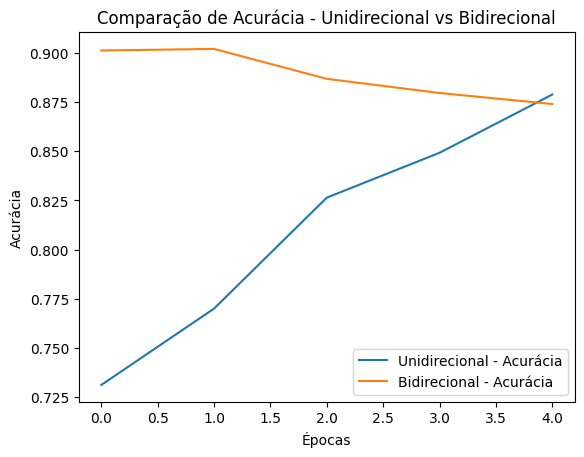

In [14]:
import matplotlib.pyplot as plt

# Comparando os históricos de treino
plt.plot(history_lstm.history['val_accuracy'], label='Unidirecional - Acurácia')
plt.plot(history_bidirectional.history['val_accuracy'], label='Bidirecional - Acurácia')
plt.title('Comparação de Acurácia - Unidirecional vs Bidirecional')
plt.ylabel('Acurácia')
plt.xlabel('Épocas')
plt.legend(loc='lower right')
plt.show()


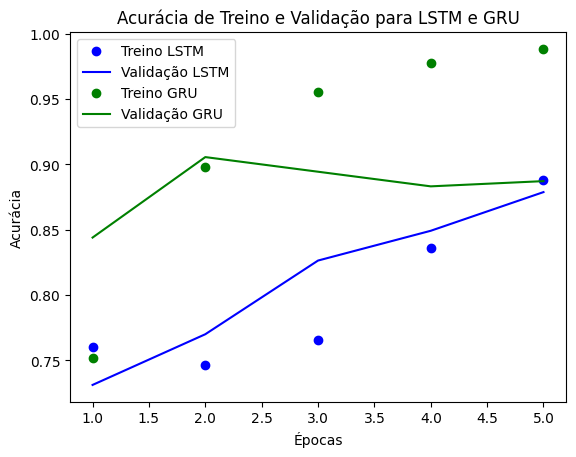

In [15]:
# Desempenho
acc_lstm = history_lstm.history['accuracy']
val_acc_lstm = history_lstm.history['val_accuracy']
acc_gru = history_gru.history['accuracy']
val_acc_gru = history_gru.history['val_accuracy']

epochs = range(1, len(acc_lstm) + 1)
plt.plot(epochs, acc_lstm, 'bo', label='Treino LSTM')
plt.plot(epochs, val_acc_lstm, 'b', label='Validação LSTM')
plt.plot(epochs, acc_gru, 'go', label='Treino GRU')
plt.plot(epochs, val_acc_gru, 'g', label='Validação GRU')
plt.title('Acurácia de Treino e Validação para LSTM e GRU')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.show()